In [ ]:
# ------------- ARIMA(p,q,d) ----------------#

In [ ]:
## 1. Using StatsModel : ARIMA and SARIMA

In [113]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox as boxtest
from statsmodels.tsa.stattools import acf, pacf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA


In [160]:
data = pd.read_csv("./daily-total-female-births-in-cal.csv")
data = data[:len(data)-1]
data.columns = ["date","y"]
data["y_diff"] = data["y"].diff()
data = data.fillna(0)
data = data.set_index("date")
print(data.tail())

             y  y_diff
date                  
1959-12-27  37     3.0
1959-12-28  52    15.0
1959-12-29  48    -4.0
1959-12-30  55     7.0
1959-12-31  50    -5.0


In [161]:
## Difference Data
ts_y = pd.Series(data["y"], index=data.index)
ts_diff = pd.Series(data["y_diff"], index=data.index)

## Box test numbers for y and y_diff
print(boxtest(ts_y, lags= int(np.log(len(ts_y))),  boxpierce=True))
print(boxtest(ts_diff,lags= int(np.log(len(ts_y))),  boxpierce=True))


(array([17.36768153, 25.99230017, 30.32546854, 33.37539139, 36.80141192]), array([3.08019236e-05, 2.26904826e-06, 1.17875566e-06, 1.00068434e-06,
       6.56433394e-07]), array([17.22571138, 25.75632873, 30.03046211, 33.03052246, 36.39119655]), array([3.31913753e-05, 2.55319673e-06, 1.35984452e-06, 1.17741564e-06,
       7.93145842e-07]))
(array([78.75531291, 78.80222783, 78.92522383, 78.94763621, 78.95337586]), array([7.02994170e-19, 7.73238813e-18, 5.21861222e-17, 2.91013270e-16,
       1.38919153e-15]), array([78.11153651, 78.1579401 , 78.2792604 , 78.30130636, 78.30693654]), array([9.73835353e-19, 1.06713398e-17, 7.17932167e-17, 3.98822797e-16,
       1.89632763e-15]))


/usr/local/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


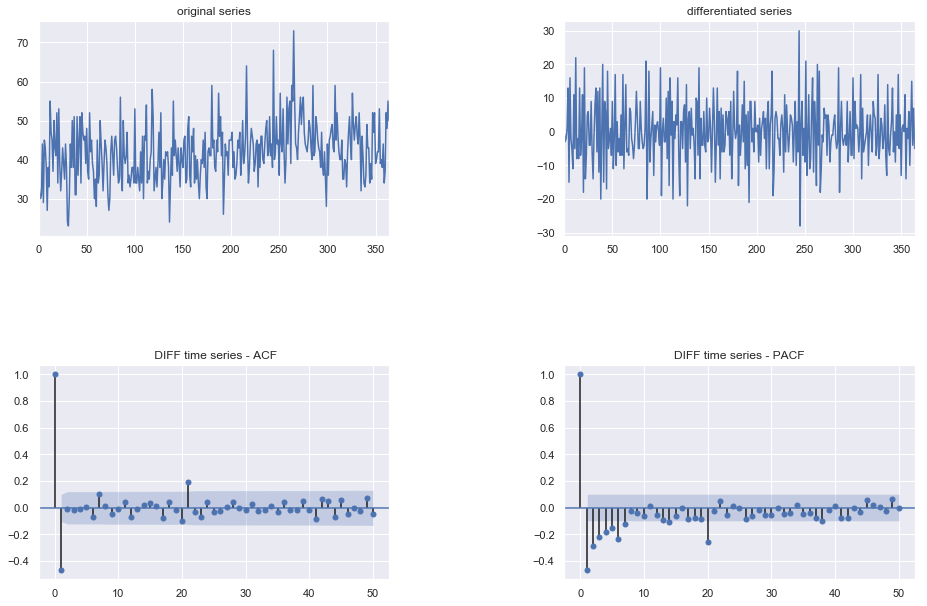

In [162]:
fig = plt.figure()
plt.subplots_adjust(wspace=0.5, hspace=0.6)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1.set_title("original series")
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title("differentiated series")
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
## original
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.tsplot(data=ts_y ,ax = ax1)

## after transformation ##
sns.tsplot(data=ts_diff, ax = ax2)

## ACF and PACF
plot_acf(ts_diff, title = " DIFF time series - ACF",ax=ax3, lags =50)
plot_pacf(ts_diff,title = "DIFF time series - PACF",ax=ax4,lags =50)

plt.show()


In [163]:
# Fit various ARIMA models
from statsmodels.tsa.arima_model import ARIMA

model_1 = ARIMA(ts_y, order=(0,1,1))
model_fit_1 = model_1.fit(disp=0)
residuals_1 = sum(pow(model_fit_1.resid,2))

model_2 = ARIMA(ts_y, order=(0,1,2))
model_fit_2 = model_2.fit(disp=0)
residuals_2 = sum(pow(model_fit_2.resid,2))

model_3 = ARIMA(ts_y, order=(7,1,1))
model_fit_3 = model_3.fit(disp=0)
residuals_3 = sum(pow(model_fit_3.resid,2))

model_4 = ARIMA(ts_y, order=(7,1,2))
model_fit_4 = model_4.fit(disp=0)
residuals_4 = sum(pow(model_fit_4.resid,2))



/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [106]:
df = pd.DataFrame([["ARIMA(0,1,1)", model_fit_1.aic,model_fit_1.bic, residuals_1],
                 ["ARIMA(0,1,2)",model_fit_2.aic,model_fit_2.bic, residuals_2],
                 ["ARIMA(7,1,1)",model_fit_3.aic,model_fit_3.bic, residuals_3],
                 ["ARIMA(7,1,2)",model_fit_4.aic,model_fit_4.bic, residuals_4]])

df.columns = ["Model","AIC","BIC","SSE"]
df = df.set_index("Model")
df.head()

,AIC,BIC,SSE
Model,,,
"ARIMA(0,1,1)",2365.189261,2376.754477,17601.656925
"ARIMA(0,1,2)",2362.807052,2378.227340,17394.606249
"ARIMA(7,1,1)",2366.488103,2405.038822,16995.478517
"ARIMA(7,1,2)",2367.998559,2410.404350,16970.072000


In [124]:
## SARIMA ##
model=sm.tsa.statespace.SARIMAX(endog=ts_y,order=(0,1,2),seasonal_order=(0,1,2,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary()) ## Has less AIC value than other above models

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  350
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1156.470
Date:                            Sun, 06 Jan 2019   AIC                           2324.940
Time:                                    13:03:43   BIC                           2347.860
Sample:                                01-01-1959   HQIC                          2334.075
                                     - 12-16-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0013      0.003     -0.394      0.693      -0.008       0.005
ma.L1         -0.8525      0.056   

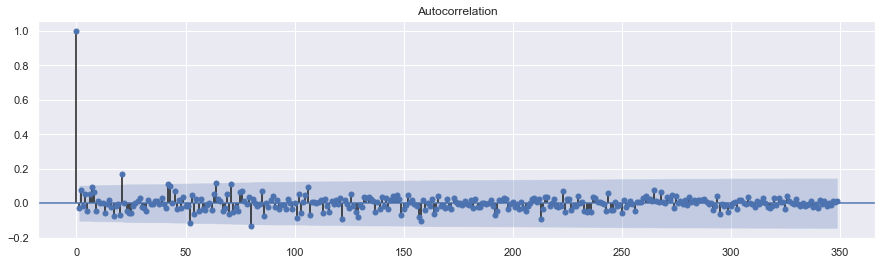

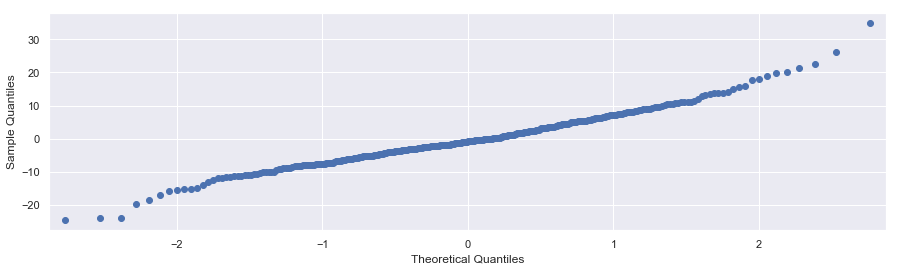

In [150]:
## Residuals PLOT
res = results.resid 
fig2 = plot_acf(res)
fig2.set_size_inches(15,4)
fig1 = sm.qqplot(res)
fig1.set_size_inches(15,4)


In [151]:
## --------------------------------------------------------------------- ##

In [153]:
## 2. Using pmdarima : auto.arima()

# fit stepwise auto-ARIMA :- The stepwise approach follows the strategy laid out by Hyndman and Khandakar in their 2008 paper, “Automatic Time Series Forecasting: The forecast Package for R”.
stepwise_fit = pm.auto_arima(ts_y, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2328.029, BIC=2347.129, Fit time=1.942 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2712.809, BIC=2720.449, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2526.516, BIC=2541.797, Fit time=0.430 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2330.803, BIC=2346.083, Fit time=1.768 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2324.715, BIC=2347.636, Fit time=2.697 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=2427.167, BIC=2446.267, Fit time=1.350 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2326.649, BIC=2353.389, Fit time=8.298 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2545.232, BIC=2560.512, Fit time=0.694 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=2328.803, BIC=2359.363, Fit time=4.452 seconds
Fit ARIMA: order=(0, 1, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  350
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1156.358
Date:                            Sun, 06 Jan 2019   AIC                           2324.715
Time:                                    13:43:40   BIC                           2347.636
Sample:                                         0   HQIC                          2333.851
                                            - 350                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0012      0.003     -0.383      0.701      -0.008       0.005
ar.L1          0.1071      0.062      1.733      0.083      -0.014       0.228
ma.L1         -0.9501      0.022    -43.485      0.000      -0.993      -0.907
ar.S.L12      -0.1430      0.057     -2.518      0.012      -0.254      -0.032
ma.S.L12      -0.9384      0.050    -18.908      0.000      -1.036      -0.841
sigma2        50.8722      4.141     12.286      0.000      42.757      58.987
===================================================================================
Ljung-Box (Q):                       28.63   Jarque-Bera (JB):                15.02
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.31
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [155]:
# fit stepwise auto-ARIMA

## Parallel
parallel_fit = pm.auto_arima(ts_y, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=False)  # set to stepwise

parallel_fit.summary()


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2328.029, BIC=2347.129, Fit time=1.961 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=2324.662, BIC=2347.582, Fit time=6.573 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2324.715, BIC=2347.636, Fit time=2.731 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2326.649, BIC=2353.389, Fit time=8.082 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=2326.739, BIC=2353.479, Fit time=7.974 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=2328.803, BIC=2359.363, Fit time=5.376 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 2, 12); AIC=nan

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  350
Model:             SARIMAX(1, 1, 1)x(0, 1, 2, 12)   Log Likelihood               -1156.331
Date:                            Sun, 06 Jan 2019   AIC                           2324.662
Time:                                    13:54:19   BIC                           2347.582
Sample:                                         0   HQIC                          2333.798
                                            - 350                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0011      0.003     -0.387      0.698      -0.007       0.005
ar.L1          0.1043      0.062      1.679      0.093      -0.017       0.226
ma.L1         -0.9486      0.022    -42.274      0.000      -0.993      -0.905
ma.S.L12      -1.0806      0.062    -17.409      0.000      -1.202      -0.959
ma.S.L24       0.1401      0.055      2.554      0.011       0.033       0.248
sigma2        50.9900      4.070     12.529      0.000      43.013      58.967
===================================================================================
Ljung-Box (Q):                       28.29   Jarque-Bera (JB):                14.82
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.31
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""